Epoch 1/120
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0089
Epoch 2/120
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0049
Epoch 3/120
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0038
Epoch 4/120
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0036
Epoch 5/120
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0040
Epoch 6/120
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0038
Epoch 7/120
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0041
Epoch 8/120
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0035
Epoch 9/120
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029
Epoch 10/120
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0031
Epoch 11/120
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0023
Epoch 12/120
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0035
Epoch 13/120
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0045
Epoch 14/120
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0035
Epoch 15/120
180/180 ━━━━━━━━━━━━━━━━━━━━ 1

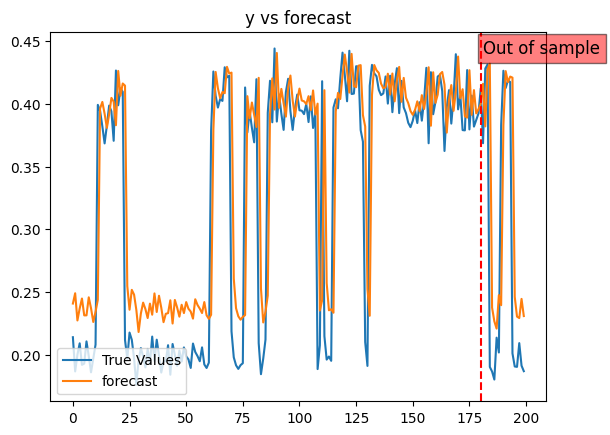

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, TimeDistributed

np.random.seed(20)
T = 210
states = np.zeros(T)
p = 0.9
M = np.array([[p,1-p],[1-p,p]])
u = np.random.uniform(0,1,T)
for t in range(1,T):
    if states[t-1] == 0:
        state_vec = [1,0]
    else:
        state_vec = [0,1]
    new_state_vec = np.dot(M,state_vec)
    if u[t] < new_state_vec[0]:
        states[t] = 0
    else:
        states[t] = 1
sigma = [0.2,0.4]
nu = 0.05
w = np.random.normal(0,1,T)
Vols = np.zeros(T)
for t in range(T):
    ind = int(np.round(states[t]))
    Vols[t] = sigma[ind] * np.exp(nu * w[t] - 0.5 * nu**2)

nepochs = 120
timesteps = 10
T_oos = T - timesteps - 20
X = []
y = []
for t in range(timesteps, T):
    X.append(Vols[t-timesteps:t])
    y.append(Vols[t])
X = np.array(X)
y = np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)

input_data = Input(shape=(timesteps, 1))
gru_output, gru_state = GRU(units=1, return_sequences=False, return_state=True)(input_data)
output = Dense(1)(gru_state)
model = Model(inputs=input_data, outputs=output)
model.compile(optimizer='adam', loss='mse')
model.fit(X[:T_oos,:,:], y[:T_oos], epochs=nepochs, batch_size=1)

predictions = model.predict(X)

# Plot the results
Max_y = np.max(y)
plt.figure()
plt.plot(y)
plt.plot(predictions)
plt.legend(['True Values','forecast'],loc='lower left')
plt.axvline(x=T_oos, color='red', linestyle='--')
plt.text(T_oos + 1, Max_y, "Out of sample", fontsize=12, verticalalignment='center', bbox=dict(facecolor='red', alpha=0.5))
plt.title('y vs forecast')

plt.show()